### Joint amplitude priors

#### Background

As discussed in [Isi, Farr 2021](https://arxiv.org/abs/2107.05609), "regular" and "mirror" ringdown modes can be paired up and treated as single elliptically-polarized modes. In this elliptical parametrization, we can write each ringdown mode in the form

$$ h_j = \frac{1}{2} A_j e^{-t/\tau_j} \left[ \left(1+\epsilon_j\right) e^{-i\left(\omega_j t - \phi_{+j}\right)} + \left(1-\epsilon_j\right) e^{i\left(\omega_j t + \phi_{-j}\right)} \right] $$

where $j \equiv \{\ell,|m|,n\}$ labels a regular-mirror mode pair. In this parametrization, uniform priors are placed on the mode amplitude $A_j$ and ellipticity $\epsilon_j$. Note that, to match the notation in [Isi, Farr 2021](https://arxiv.org/abs/2107.05609), $\omega_j$ is the real part of the quasinormal-mode frequency.

In the `ringdown` package, I have chosen to remain in the regular-mirror mode parametrization. An equivalent ringdown mode would then be written

\begin{align}
h_j &= \left[ C_{+j} e^{-i \omega_j t} + C_{-j} e^{i \omega_j t} \right] e^{-t/\tau_j} \\
&= \left[ \left|C_{+j}\right| e^{-i\left(\omega_j t - \phi_{+j}\right)} + \left|C_{-j}\right| e^{i\left(\omega_j t + \phi_{-j}\right)} \right] e^{-t/\tau_j}.
\end{align}

Note that in the above we have applied the conjugate symmetry between the regular and mirror modes to remove any distiction between them.

The parametrizations are related by

$$ C_{\pm j} = \frac{1}{2} \left( 1 \pm \epsilon_j \right) A_j e^{i \phi_{\pm j}} $$

or the inverse

\begin{align}
A_j &= \left|C_{+j}\right| + \left|C_{-j}\right| \\
\epsilon_j &= \frac{\left|C_{+j}\right| - \left|C_{-j}\right|}{\left|C_{+j}\right| + \left|C_{-j}\right|}.
\end{align}

(the phases are unchanged).

A uniform prior on $\left|C_{\pm j}\right|$ does not translate to a uniform prior on $A_{\pm j}$, but we can choose a prior which does make this the case.

#### Calculation of regular-mirror mode prior

If we have a uniform prior on $A_j$ and $\epsilon_j$, i.e. $p'(A_j, \epsilon_j) = \mathrm{const}$ (between the prior bounds), then we want to know what the corresponding prior on $\left|C_{\pm j}\right|$ is. That the probability contained in a differential area must be invariant under change of variables gives us the relationship $| p(x) ~ \mathrm{d}x| = |p'(y) ~ \mathrm{d}y|$. This can be generalised to higher dimensions, and in our case we have

$$
p\left( \left|C_{+j}\right|, \left|C_{-j}\right| \right) = p'(A_j, \epsilon_j) 
\begin{vmatrix} 
\frac{\partial A_j}{\partial \left|C_{+j}\right|} & \frac{\partial A_j}{\partial \left|C_{-j}\right|} \\ 
\frac{\partial \epsilon_j}{\partial \left|C_{+j}\right|} & \frac{\partial \epsilon_j}{\partial \left|C_{-j}\right|} \\
\end{vmatrix}.
$$

We can calculate the derivative using the above relationships between the parametrizations. We have

$$ \frac{\partial A_j}{\partial \left|C_{\pm j}\right|} = 1  \qquad \frac{\partial \epsilon_j}{\partial \left|C_{\pm j}\right|} = \pm \frac{2 \left|C_{\mp j}\right|}{\left( \left|C_{+j}\right| + \left|C_{-j}\right|\right)^2} $$

Substituting and calculating the determinant, we have

$$ p\left( \left|C_{+j}\right|, \left|C_{-j}\right| \right) = -2 p'(A_j, \epsilon_j) \frac{1}{\left|C_{+j}\right| + \left|C_{-j}\right|} $$

We can work out the shape of this distribution from the bounds on $A_j$ and $\epsilon_j$ (which is information contained in their prior). For the amplitude we have $A_\mathrm{min} \leq A_j \leq A_\mathrm{max}$. Looking at the relationship between $A_j$ and $\left|C_{\pm j}\right|$, this means the sum of the regular-mirror mode amplitudes can't be less than $A_\mathrm{min}$ and can't exceed $A_\mathrm{max}$. The bound on the ellipticity closes this shape: $-1 \leq \epsilon_j \leq 1$ translates to the prior being contained by the lines $\left|C_{\pm j}\right| = 0$ (see the figures below).

We can calculate the normalization of $p\left( \left|C_{+j}\right|, \left|C_{-j}\right| \right)$ by integrating over its volume. This gives 

$$ p\left( \left|C_{+j}\right|, \left|C_{-j}\right| \right) = \frac{1}{A_\mathrm{max} - A_\mathrm{min}} \frac{1}{\left|C_{+j}\right| + \left|C_{-j}\right|}. $$

However, this normalization will not be useful when we come to calculate the prior transform associated with this prior.

#### Calculation of the corresponding prior transform

In the code we draw samples for each parameter uniformly between $0$ and $1$. So, we need to provide a prior transformation to map these onto the required probability distribution. In the 1D case, this can be done by finding the inverse of the cumulative distribution function. In the 2D case, as we have here, it is not as simple because there is not a single one-to-one mapping. 

To simplify notation I will use $\alpha$ and $\beta$ in place of $\left|C_{\pm j}\right|$. Then, the problem is that we want to transform samples $x$ and $y$ (drawn uniformly from the unit square) such that they jointly follow the distribution

$$ p(\alpha, \beta) = \frac{C}{\alpha + \beta} $$

where $C$ is a constant. 

We choose to change variables with the subsitution

$$ \gamma = \alpha + \beta, \qquad \delta = \alpha - \beta $$

and then we map $x$ to $\gamma$ with $| p(\gamma) ~ \mathrm{d}\gamma| = |p'(x) ~ \mathrm{d}x|$:

\begin{align}
&\implies \left| \frac{C}{\gamma} ~ \mathrm{d}\gamma \right| = |\mathrm{d}x| \\
&\implies \left| \frac{\mathrm{d}\gamma}{\mathrm{d}x} \right| = \frac{1}{C} \gamma.
\end{align}

We choose to drop the modulus (I think we have that freedom), and we can integrate to get

$$ \implies \gamma = De^{\frac{1}{C}x}. $$

The constants $C$ and $D$ are determined with the boundary conditions:

$$ \gamma(0) = A_\mathrm{min} \implies D = A_\mathrm{min} $$

$$ \gamma(1) = A_\mathrm{max} \implies \frac{1}{C} = \ln\left(\frac{A_\mathrm{\max}}{A_\mathrm{min}}\right) $$

and so we have for $\gamma$

$$ \gamma = A_\mathrm{min}e^{\ln\left(\frac{A\mathrm{max}}{A_\mathrm{min}}\right)x} = A_\mathrm{min} \left(\frac{A_\mathrm{max}}{A_\mathrm{min}}\right)^x. $$

For $\delta$ we use the fact that $-\gamma \leq \delta \leq \gamma$ (this can be seen from their definitions). This can be ensured by rescaling $y$ to be between $-1$ and $1$, and then multiplying by $\gamma$:

$$ \delta = (2y-1)\gamma. $$

Finally, we invert for $\alpha$ and $\beta$:

$$ \alpha = \frac{1}{2}(\gamma + \delta), \qquad \beta = \frac{1}{2}(\gamma - \delta). $$

Below we draw samples from the unit square, and apply the above prior transformation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import corner

from numpy.random import default_rng
rng = default_rng()

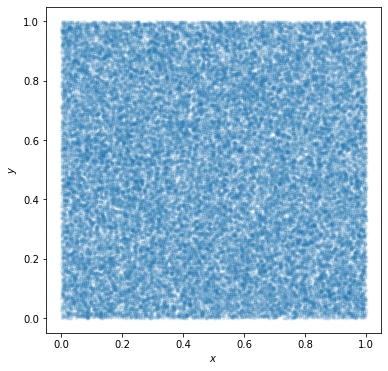

In [2]:
# Our x and y samples from the unit square
size = int(5e4)
x, y = rng.uniform(size=size), rng.uniform(size=size)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, marker='.', alpha=0.1)

ax.set_xlabel('$x$')
_ = ax.set_ylabel('$y$')

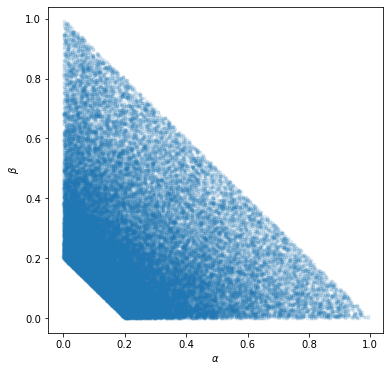

In [3]:
def transform(x,y):
    """
    Takes samples drawn from the unit square, and transforms them such that 
    they follow a joint distribution given by p(a,b) = C/(a+b) where C is a
    constant.
    
    This is implemented as `uniform_sum` in ringdown.prior.
    """
    
    Amin = 0.2
    Amax = 1
    
    gamma = Amin*(Amax/Amin)**x
    delta = gamma*(2*y - 1)
    
    alpha = (gamma + delta)/2
    beta = (gamma - delta)/2
    
    return alpha, beta

alpha, beta = transform(x,y)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(alpha, beta, marker='.', alpha=0.1)

ax.set_xlabel(r'$\alpha$')
_ = ax.set_ylabel(r'$\beta$')

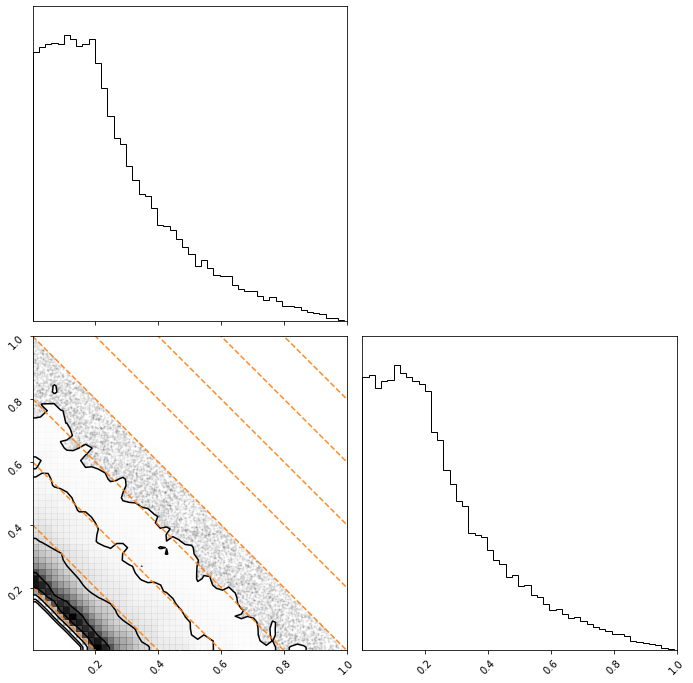

In [4]:
# We expect the new distribution to have lines of constant density along 
# alpha + beta = const (corresponding to a constant "elliptical mode" 
# amplitude A).

fig, axs = plt.subplots(2, 2, figsize=(12,12))

corner.corner(
    np.vstack((alpha,beta)).T,
    bins=50,
    smooth=0.7,
    hist_kwargs={'density':True},
    fig=fig
)

# Overlay the expected contour directions
contour_vals = np.linspace(0,1)
for i in np.arange(0,2,0.2):
    axs[1,0].plot(
        contour_vals, 
        -contour_vals+i, 
        c='C1',
        alpha=0.9,
        linestyle='--'
        )
    
# Can we plot the 1D marginals?

# Amin = 0.2
# Amax = 1

# norm = 1/(Amin + (Amax - Amin - Amin*np.log(Amax) + Amin*np.log(Amin))/np.log(Amax/Amin))

# y_marg = np.linspace(Amin,Amax,50)
# x_marg = np.log((Amax/y_marg))/(Amax-Amin)

# axs[0,0].plot(y_marg, x_marg)
# axs[0,0].axhline(norm)

axs[0,0].set_xlim(0,1)
axs[1,0].set_xlim(0,1)
axs[1,0].set_ylim(0,1)
axs[1,1].set_xlim(0,1)

plt.show()